# Importing Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
import warnings

In [2]:
warnings.filterwarnings('ignore')

## 1.1 Loading Dataset

In [3]:
df = pd.read_csv('/kaggle/input/playground-series-s4e2/train.csv')

In [4]:
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
df['NObeyesdad'].unique()

array(['Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight',
       'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I',
       'Obesity_Type_I'], dtype=object)

##  1.2 Handling Imbalanced Dataset

<Axes: xlabel='NObeyesdad', ylabel='count'>

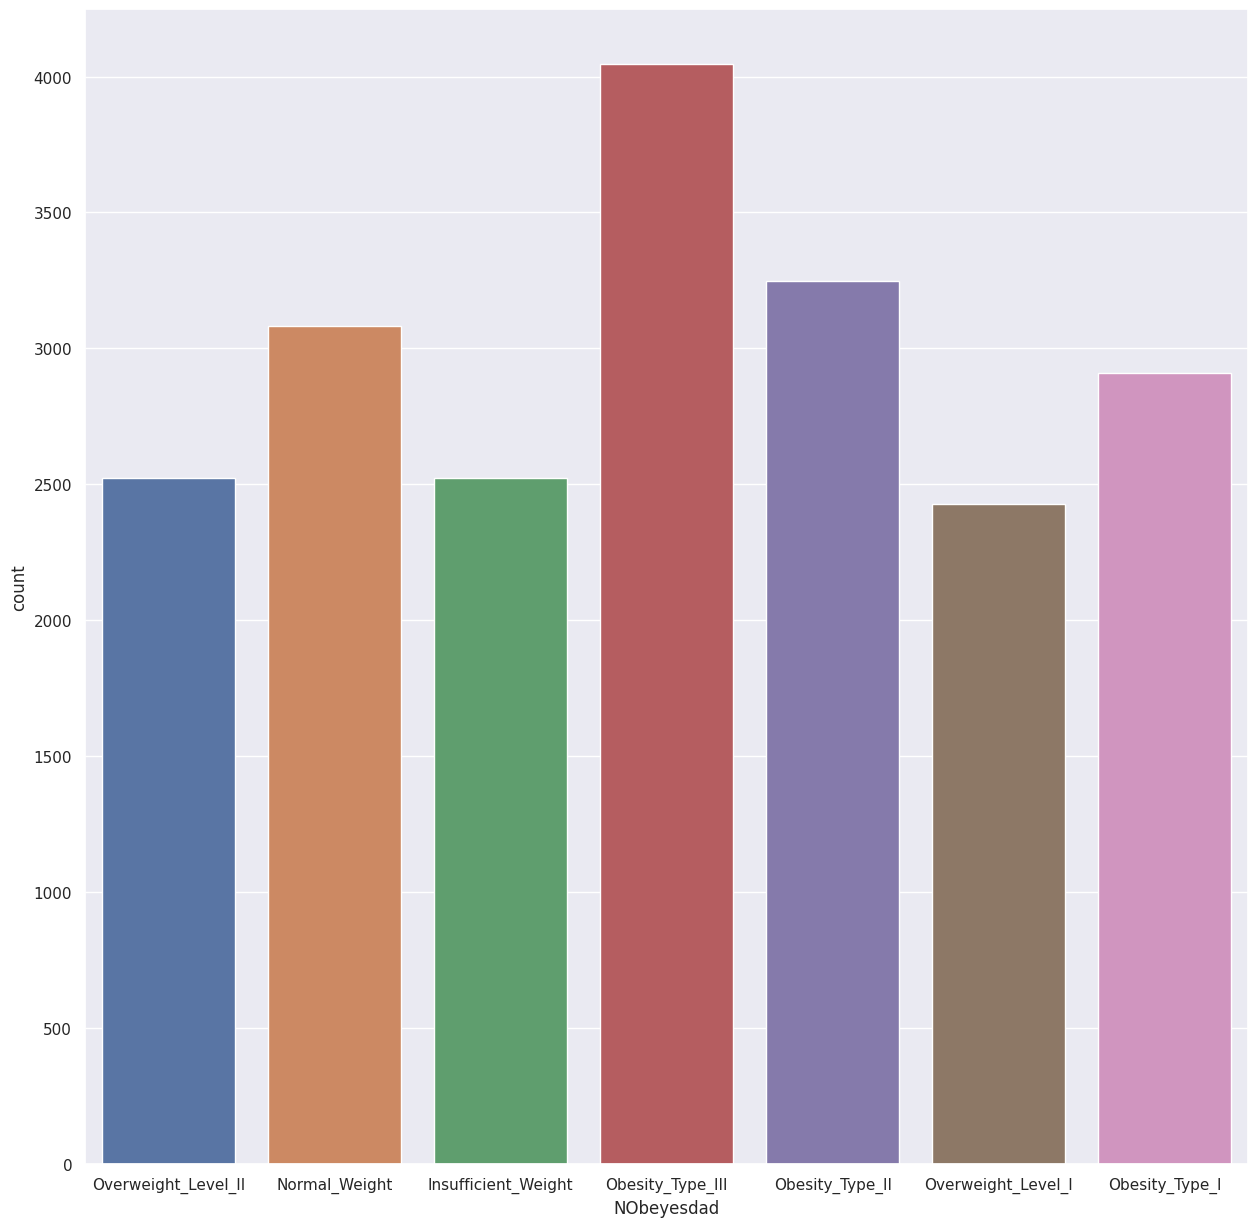

In [6]:
sns.set(rc={'figure.figsize':(15,15)})
sns.countplot(data = df , x = 'NObeyesdad')

In [7]:
ros = RandomOverSampler(random_state= 24)
X,y = ros.fit_resample(df.drop(['NObeyesdad'],axis = 1),df['NObeyesdad'])

In [8]:
df_resampled = X
df_resampled['NObeyesdad'] = y

In [9]:
df_resampled

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28317,4781,Male,17.000000,1.800000,85.000000,no,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,Sometimes,Public_Transportation,Overweight_Level_II
28318,17049,Male,21.000000,1.700000,80.000000,yes,yes,2.000000,3.000000,Sometimes,no,3.000000,no,1.000000,1.000000,no,Public_Transportation,Overweight_Level_II
28319,14051,Male,17.000000,1.700000,83.000000,yes,no,2.000000,4.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Walking,Overweight_Level_II
28320,9634,Male,19.149706,1.699437,78.000000,yes,yes,2.000000,2.070033,Sometimes,no,2.000000,no,0.000000,1.639326,no,Public_Transportation,Overweight_Level_II


<Axes: xlabel='NObeyesdad', ylabel='count'>

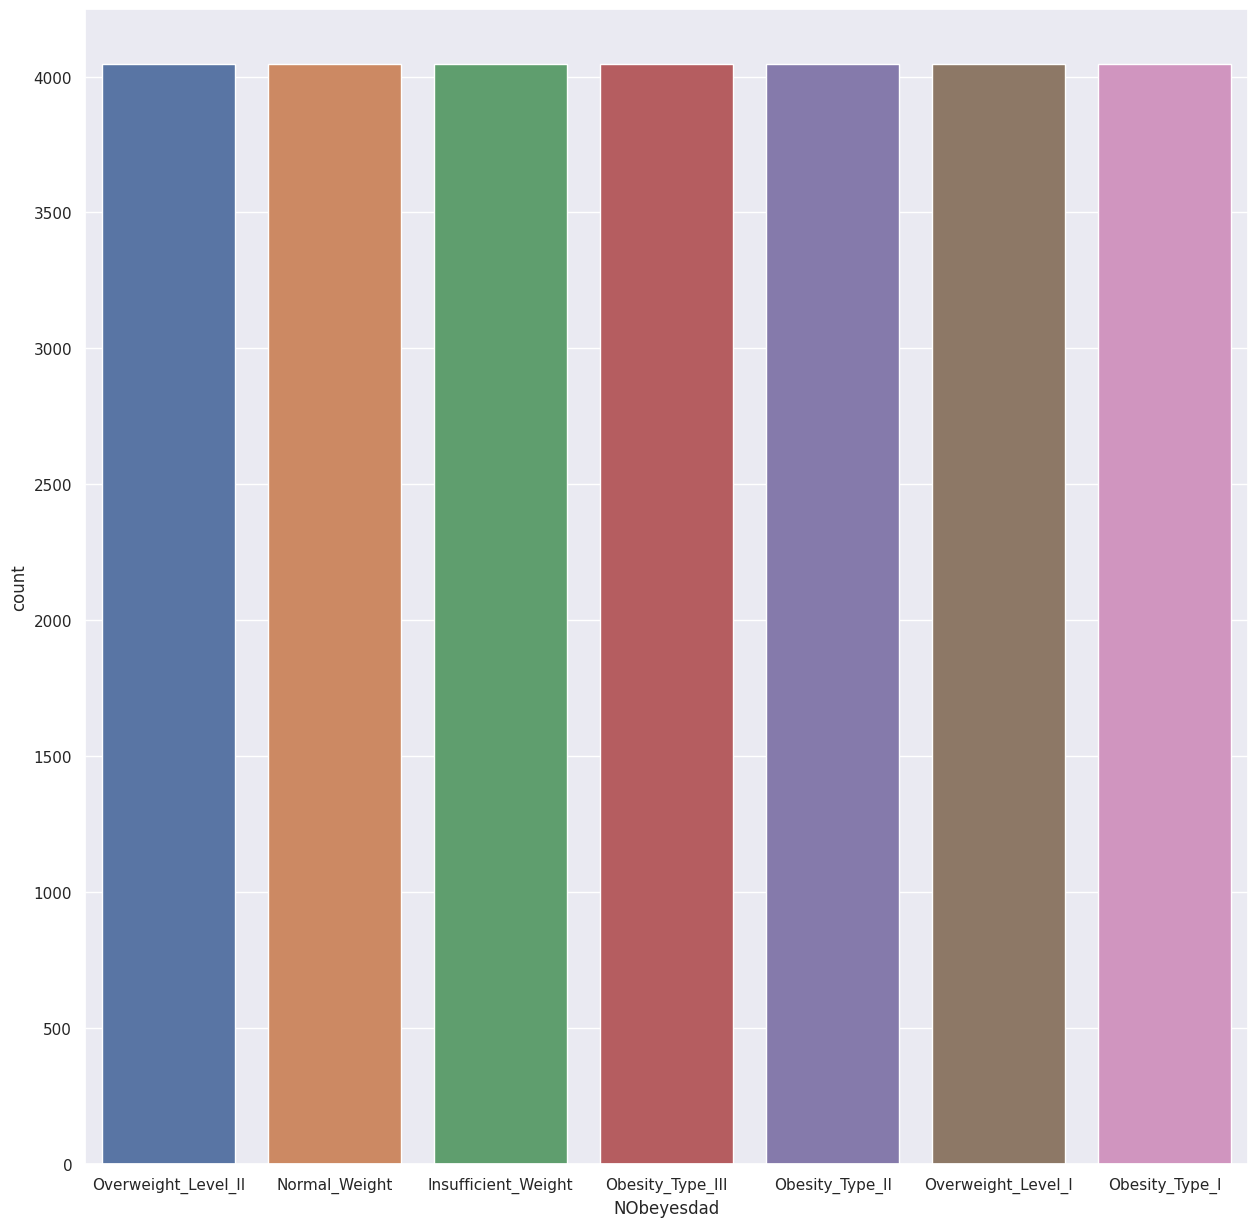

In [10]:
sns.countplot(data = df_resampled , x = 'NObeyesdad')

In [11]:
test_df = pd.read_csv('/kaggle/input/playground-series-s4e2/test.csv')
test_df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


## 1.3 Handling Categorical Features 

In [12]:
categorical_features = df_resampled.select_dtypes('object').columns

# CAEC and CALC from categorical as CALC in train.csv missing 'always' in unique elements
categorical_features = np.delete(categorical_features,6)

le = LabelEncoder() 
for feature_name in categorical_features:
    df_resampled[feature_name] = le.fit_transform(df_resampled[feature_name])
    try:
        test_df[feature_name] = le.transform(test_df[feature_name])
    except:
        continue
    if feature_name == 'CAEC':
        df_resampled['CALC']  = le.transform(df_resampled['CALC'])
        test_df['CALC'] = le.transform(test_df['CALC'])

In [13]:
df_resampled.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,2,0,2.763573,0,0.000000,0.976473,2,3,6
1,1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,1,0,2.000000,0,1.000000,1.000000,3,0,1
2,2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,2,0,1.910378,0,0.866045,1.673584,3,3,0
3,3,0,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,2,0,1.674061,0,1.467863,0.780199,2,3,4
4,4,1,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,2,0,1.979848,0,1.967973,0.931721,2,3,6


In [14]:
test_df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,1,26.899886,1.848294,120.644178,1,1,2.938616,3.000000,2,0,2.825629,0,0.855400,0.000000,2,3
1,20759,0,21.000000,1.600000,66.000000,1,1,2.000000,1.000000,2,0,3.000000,0,1.000000,0.000000,2,3
2,20760,0,26.000000,1.643355,111.600553,1,1,3.000000,3.000000,2,0,2.621877,0,0.000000,0.250502,2,3
3,20761,1,20.979254,1.553127,103.669116,1,1,2.000000,2.977909,2,0,2.786417,0,0.094851,0.000000,2,3
4,20762,0,26.000000,1.627396,104.835346,1,1,3.000000,3.000000,2,0,2.653531,0,0.000000,0.741069,2,3


## 1.4 Removing Unwanted Rows 

In [15]:
test_id = test_df['id']

In [16]:
df_resampled.drop(['id'], axis = 1, inplace = True)
test_df.drop(['id'],axis = 1, inplace = True)

## 1.5 Visualization on Resampled Dataset  

array([[<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Weight'}>],
       [<Axes: title={'center': 'family_history_with_overweight'}>,
        <Axes: title={'center': 'FAVC'}>,
        <Axes: title={'center': 'FCVC'}>,
        <Axes: title={'center': 'NCP'}>],
       [<Axes: title={'center': 'CAEC'}>,
        <Axes: title={'center': 'SMOKE'}>,
        <Axes: title={'center': 'CH2O'}>,
        <Axes: title={'center': 'SCC'}>],
       [<Axes: title={'center': 'FAF'}>, <Axes: title={'center': 'TUE'}>,
        <Axes: title={'center': 'CALC'}>,
        <Axes: title={'center': 'MTRANS'}>],
       [<Axes: title={'center': 'NObeyesdad'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

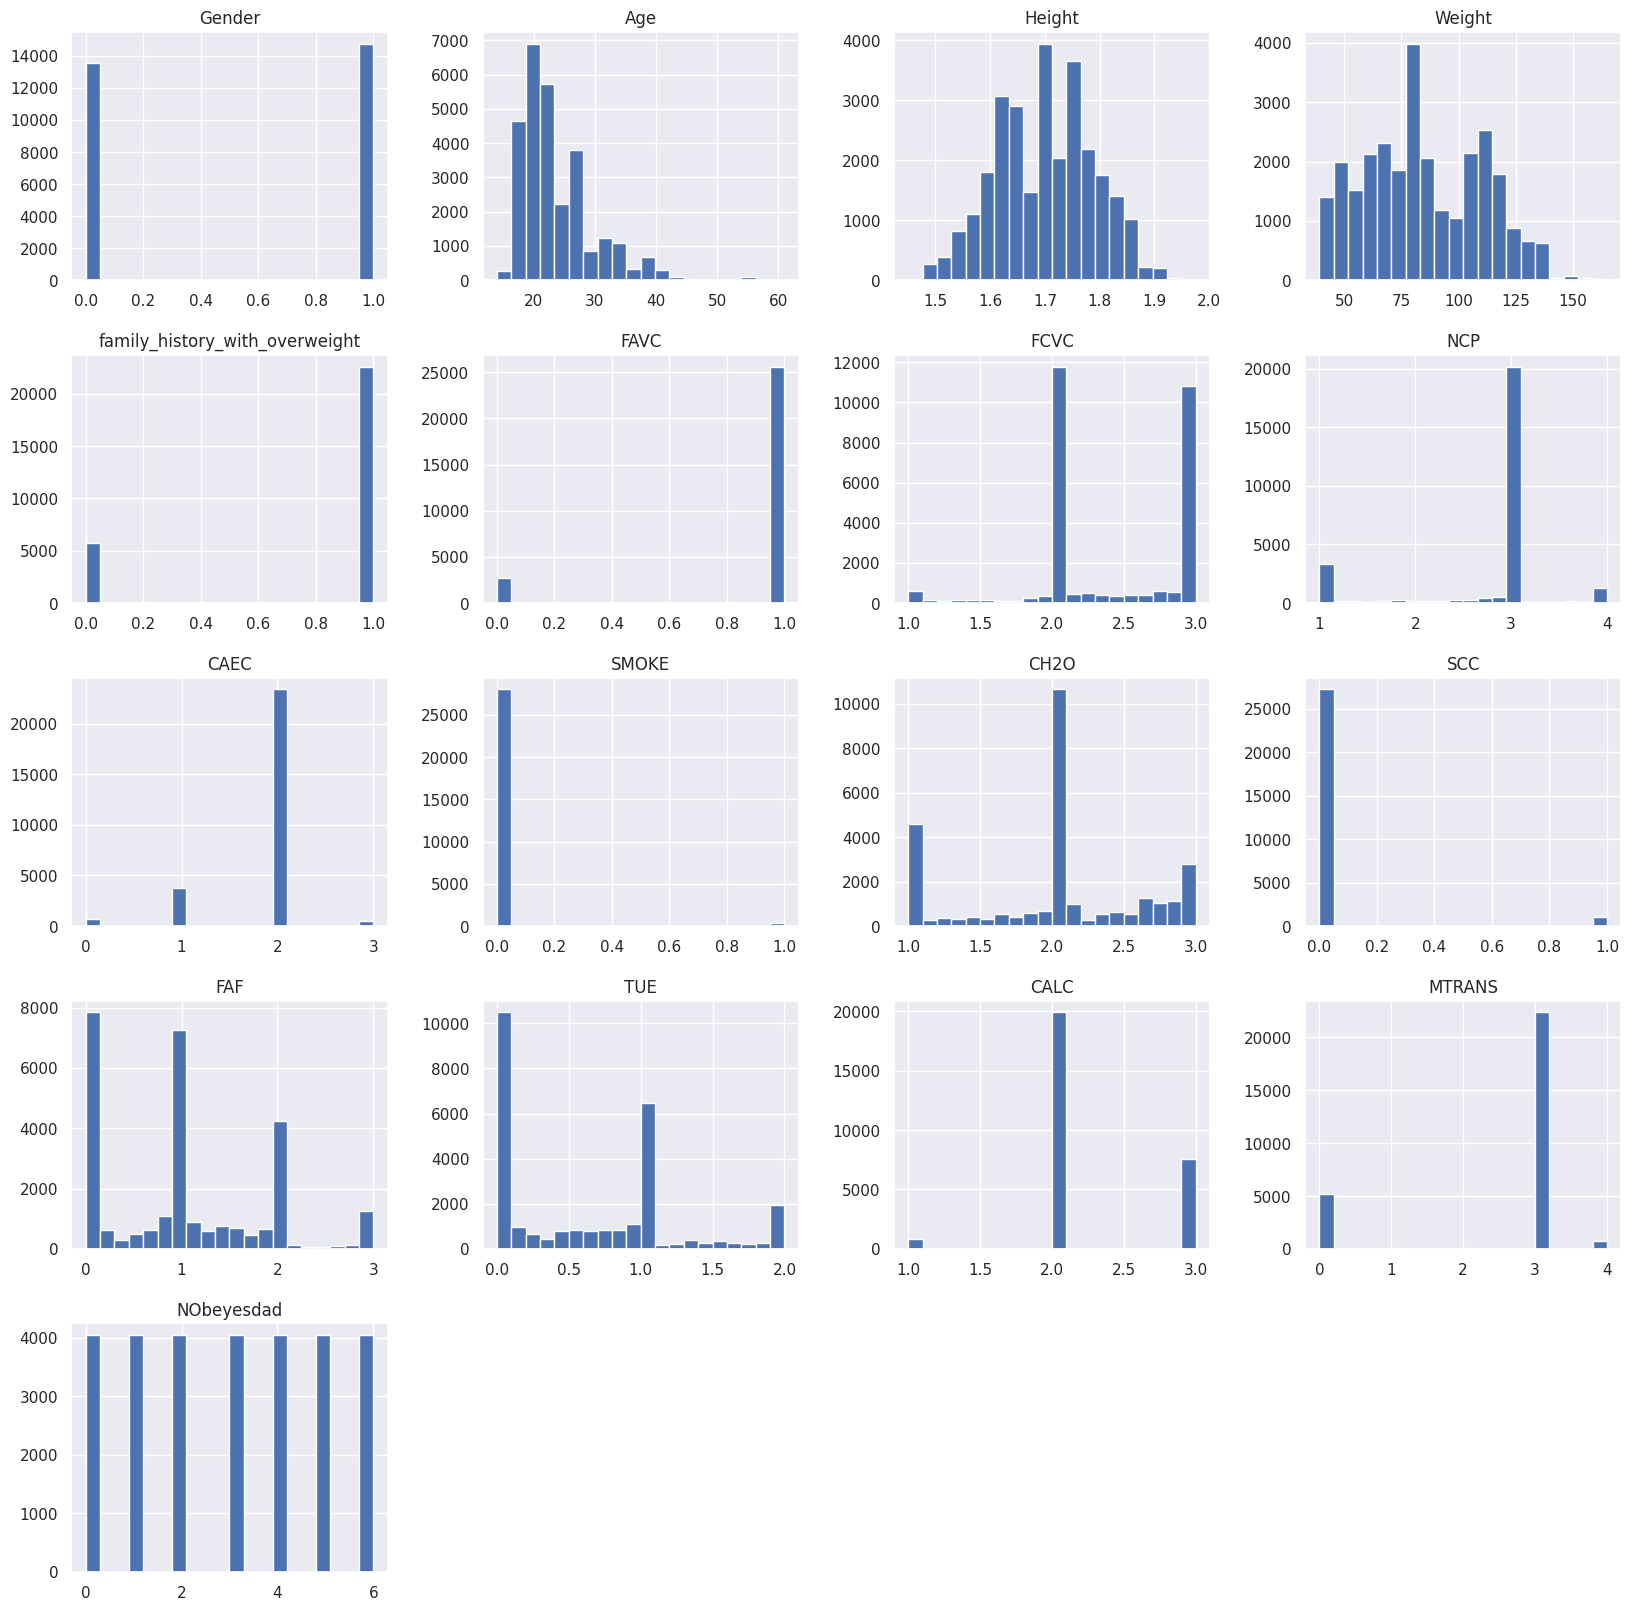

In [17]:
df_resampled.hist(bins = 20,figsize= (20,20))

<Axes: xlabel='CH2O'>

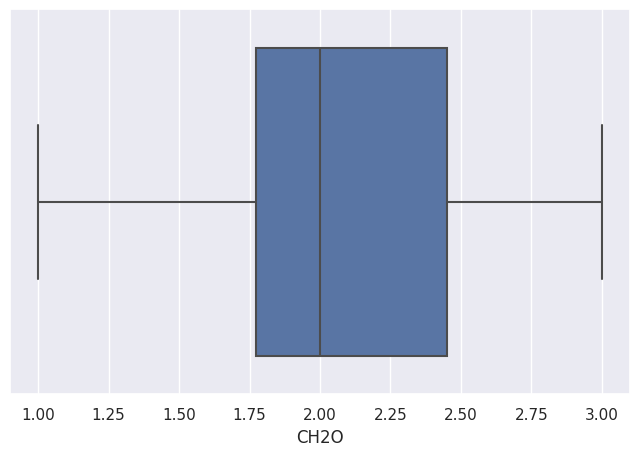

In [18]:
sns.set(rc={'figure.figsize':(8,5)})
sns.boxplot(data = df_resampled , x = 'CH2O')

<Axes: xlabel='Weight'>

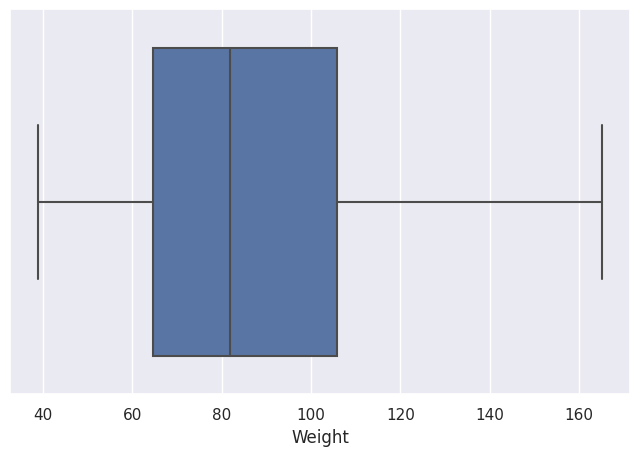

In [19]:
sns.boxplot(data = df_resampled , x = 'Weight')

<Axes: xlabel='Height'>

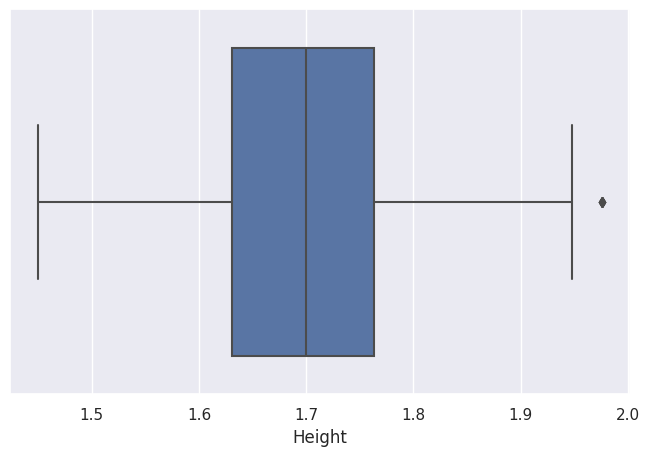

In [20]:
sns.boxplot(data = df_resampled , x = 'Height')

<Axes: xlabel='FCVC'>

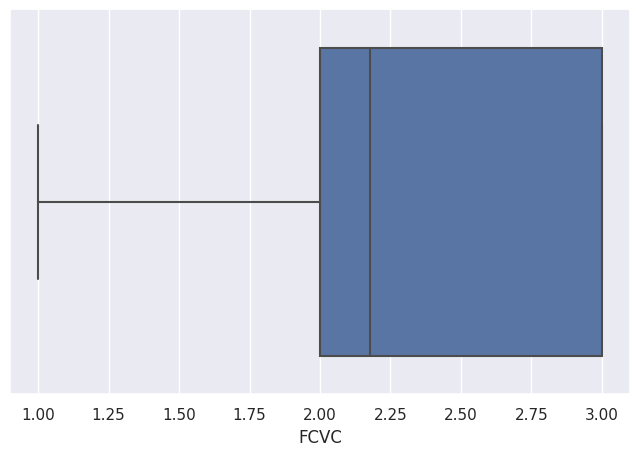

In [21]:
sns.boxplot(data = df_resampled , x = 'FCVC')

<Axes: xlabel='FAF'>

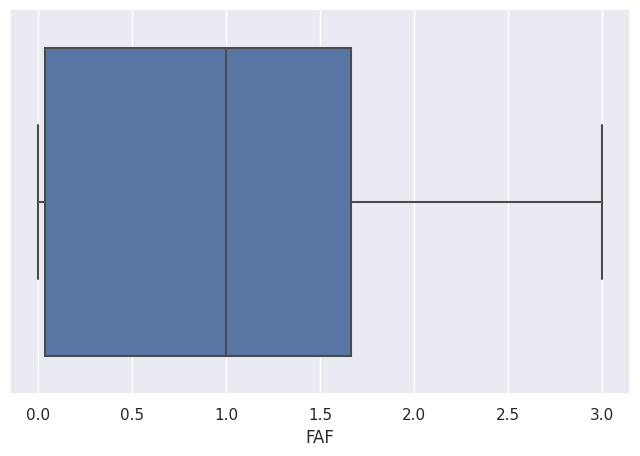

In [22]:
sns.boxplot(data = df_resampled , x = 'FAF')

<Axes: xlabel='TUE'>

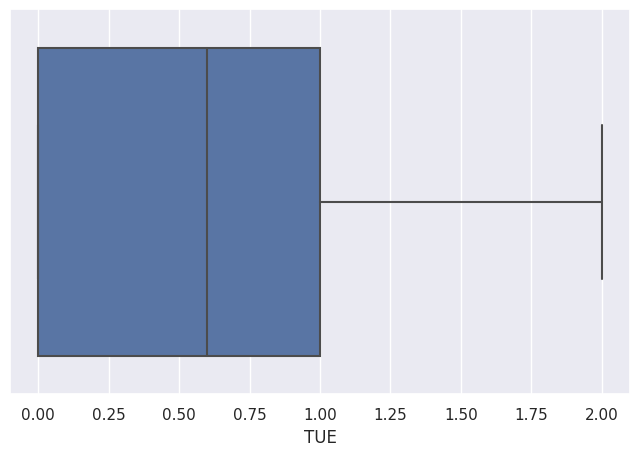

In [23]:
sns.boxplot(data = df_resampled , x = 'TUE')

## 1.6 Removing Outliers 

In [24]:
Q1 = df_resampled['Height'].quantile(0.25)
Q3 = df_resampled['Height'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df_resampled['Height'] >= Q1 - 1.5 * IQR) & (df_resampled['Height'] <= Q3 + 1.5 *IQR)

In [25]:
df_resampled = df_resampled.loc[filter]

<Axes: xlabel='Height'>

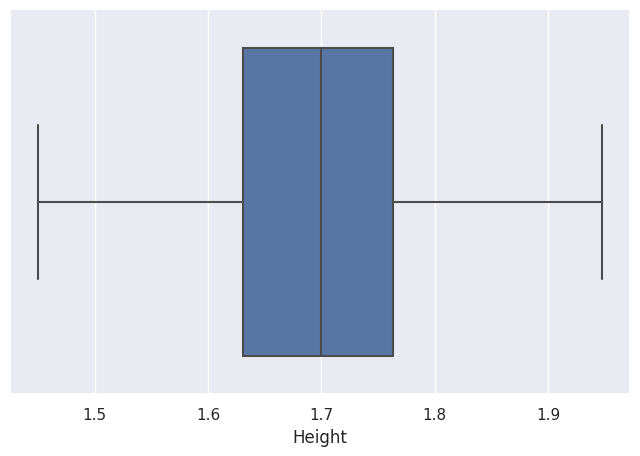

In [26]:
sns.boxplot(data = df_resampled, x = 'Height')

## 1.7 Checking Correlation 

<Axes: >

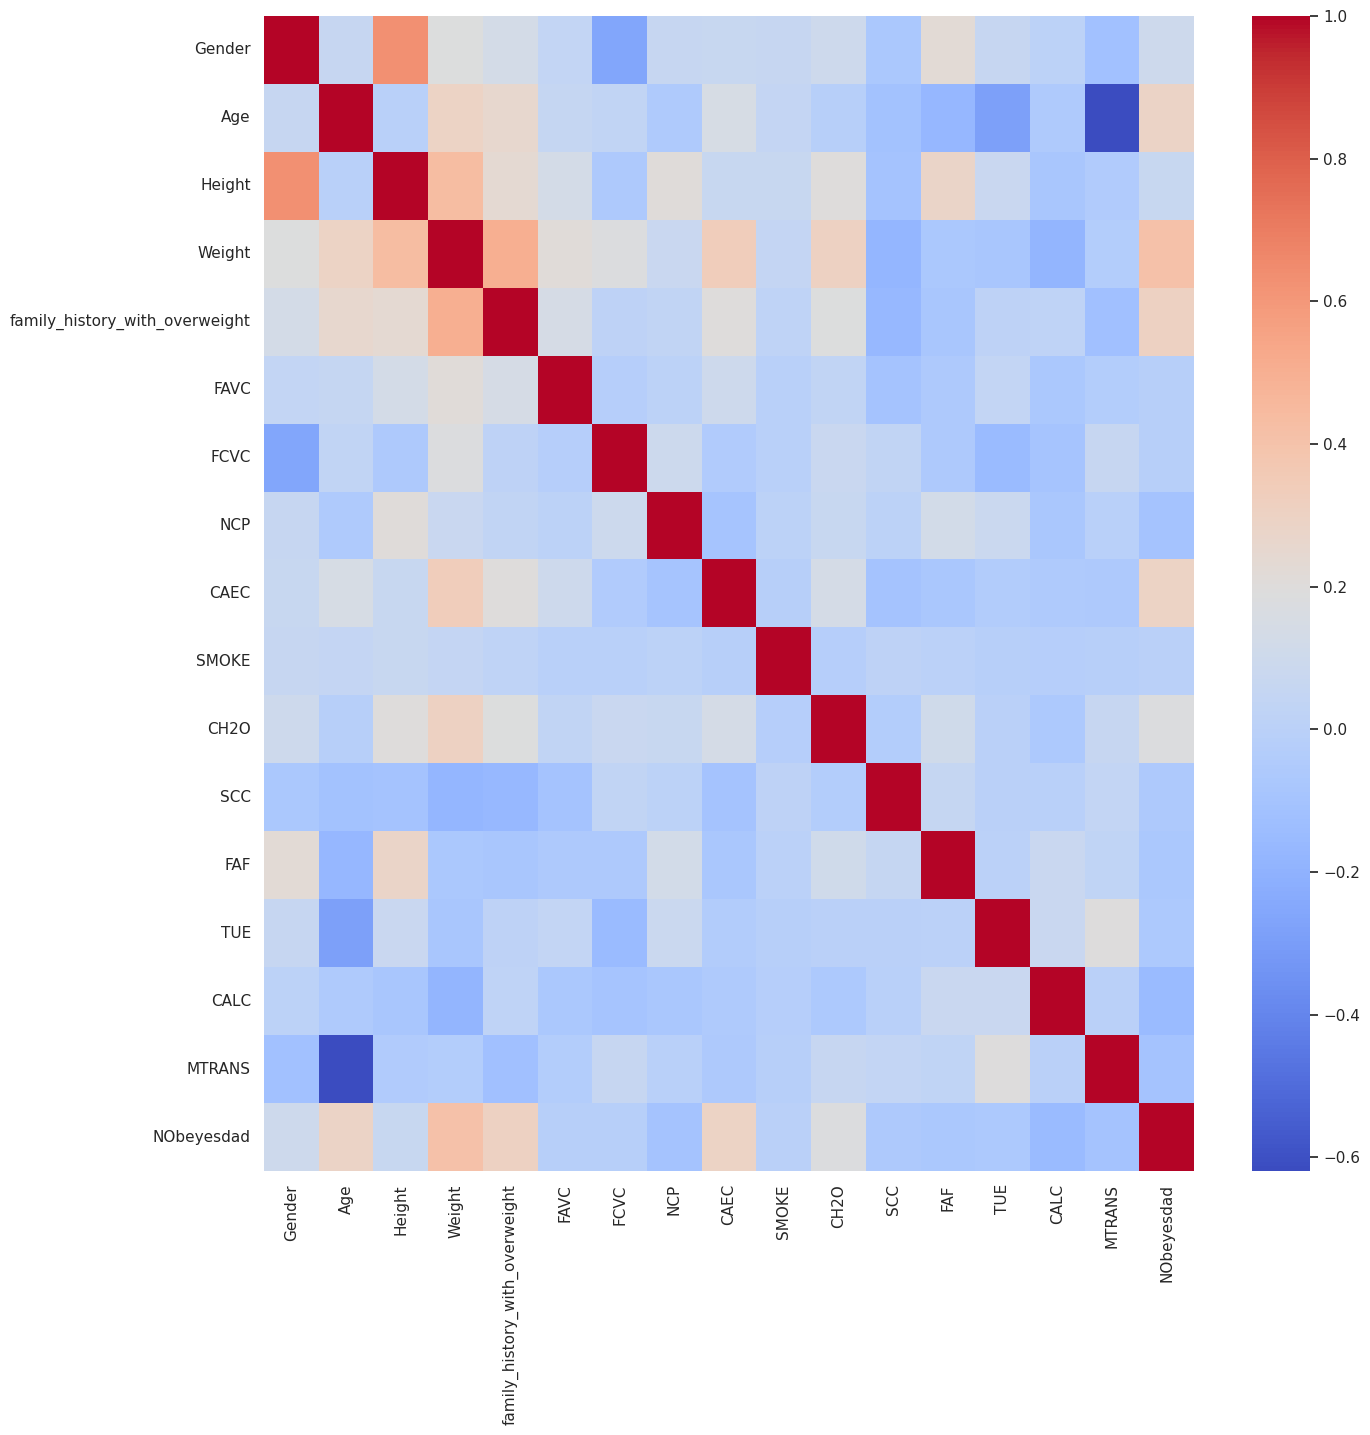

In [27]:
sns.set(rc={'figure.figsize':(15,15)})
sns.heatmap(data = df_resampled.corr(),cmap = 'coolwarm')

# 2.1 Spliting 

In [28]:
X_train, X_test, y_train, y_test = train_test_split(df_resampled.drop(['NObeyesdad'],axis = 1),df_resampled['NObeyesdad'], test_size= 0.2)

## 2.2 Scaling  

In [29]:
# scaler = MinMaxScaler()
# scaler.fit(X_train)
# X_test = scaler.transform(X_test)
# X_train = scaler.transform(X_train)
# test_scaled_df = scaler.transform(test_df)

# 3.0 ML Models

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, recall_score, classification_report, confusion_matrix,f1_score

## 3.1 Logistic Regression

In [31]:
lr = LogisticRegression(max_iter = 1500)
k = OneVsRestClassifier(estimator = lr).fit(X_train,y_train)

In [32]:
y_pred = k.predict(X_test)
print("Accuracy Score: ",accuracy_score(y_test,y_pred))
print("Recall Score: ",recall_score(y_test,y_pred, average='micro'))
print("Classification Report: \n",classification_report(y_test,y_pred))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))

Accuracy Score:  0.7392302259887006
Recall Score:  0.7392302259887006
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.97      0.90       805
           1       0.68      0.53      0.60       834
           2       0.64      0.68      0.66       834
           3       0.88      0.96      0.92       810
           4       0.99      1.00      0.99       799
           5       0.55      0.55      0.55       787
           6       0.54      0.48      0.51       795

    accuracy                           0.74      5664
   macro avg       0.73      0.74      0.73      5664
weighted avg       0.73      0.74      0.73      5664

Confusion Matrix: 
 [[784  12   1   0   0   3   5]
 [138 444  20   0   0 148  84]
 [  0  10 571 102   7  45  99]
 [  0   1  25 780   1   0   3]
 [  0   0   0   2 797   0   0]
 [  6 130  84   0   0 429 138]
 [  0  52 197   5   1 158 382]]


## 3.2 Decision Tree Classifier 

In [33]:
dt  = DecisionTreeClassifier()
ovr = OneVsRestClassifier(dt).fit(X_train,y_train)

In [34]:
y_pred = ovr.predict(X_test)
print("Accuracy Score: ",accuracy_score(y_test,y_pred))
print("Recall Score: ",recall_score(y_test,y_pred, average='micro'))
print("Classification Report: \n",classification_report(y_test,y_pred))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))

Accuracy Score:  0.8981285310734464
Recall Score:  0.8981285310734464
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.92      0.94       805
           1       0.92      0.84      0.88       834
           2       0.95      0.82      0.88       834
           3       0.96      0.96      0.96       810
           4       1.00      0.99      0.99       799
           5       0.86      0.85      0.86       787
           6       0.70      0.91      0.79       795

    accuracy                           0.90      5664
   macro avg       0.91      0.90      0.90      5664
weighted avg       0.91      0.90      0.90      5664

Confusion Matrix: 
 [[737  37   0   1   0   3  27]
 [ 18 704   1   0   0  57  54]
 [  0   0 686  26   2   8 112]
 [  0   0   4 776   1   0  29]
 [  0   0   1   2 793   0   3]
 [  2  18   6   0   0 670  91]
 [  0   6  27   2   0  39 721]]


## 3.3 Random Forest Classifier 

In [35]:
rf = RandomForestClassifier()
ovr  = OneVsRestClassifier(rf).fit(X_train,y_train)

In [36]:
y_pred = ovr.predict(X_test)
print("Accuracy Score: ",accuracy_score(y_test,y_pred))
print("Recall Score: ",recall_score(y_test,y_pred, average='micro'))
print("Classification Report: \n",classification_report(y_test,y_pred))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))

Accuracy Score:  0.9484463276836158
Recall Score:  0.9484463276836158
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.97      0.96       805
           1       0.94      0.94      0.94       834
           2       0.95      0.92      0.94       834
           3       0.98      0.99      0.99       810
           4       1.00      1.00      1.00       799
           5       0.91      0.93      0.92       787
           6       0.90      0.90      0.90       795

    accuracy                           0.95      5664
   macro avg       0.95      0.95      0.95      5664
weighted avg       0.95      0.95      0.95      5664

Confusion Matrix: 
 [[778  25   1   0   0   1   0]
 [ 26 780   0   0   0  26   2]
 [  0   0 770  10   2   9  43]
 [  0   0   4 801   1   0   4]
 [  0   0   1   2 796   0   0]
 [  3  20   4   0   0 728  32]
 [  1   8  29   3   0  35 719]]


In [37]:
f1_score(y_test,y_pred,average = 'micro')

0.9484463276836158

In [38]:
test_y_pred = ovr.predict(test_df)

In [39]:
test_y_pred = le.inverse_transform(test_y_pred)

In [40]:
sub = pd.DataFrame({'id':test_id,'NObeyesdad':test_y_pred})
sub.to_csv('submission.csv', index=False,header = True)

In [41]:
sub

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
...,...,...
13835,34593,Overweight_Level_II
13836,34594,Overweight_Level_I
13837,34595,Insufficient_Weight
13838,34596,Normal_Weight


In [42]:
np.unique(sub.NObeyesdad)

array(['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I',
       'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I',
       'Overweight_Level_II'], dtype=object)

Getting Around 0.900 score 

### 3.3.1 Randomized Search CV 

In [43]:
# params = {
#     "n_estimators" : [int(x) for x in np.linspace(100,1000)],
#     "max_depth" : [i for i in range(20,40)]
# #     "min_samples_split" : [i for i in range(2,5)]
# #     "min_samples_leaf" : [i for i in range(10,20)]
# }

In [44]:
# rf = RandomForestClassifier(random_state = 42)
# rcv = RandomizedSearchCV(estimator = rf, param_distributions=params,n_iter = 20, cv = 2,verbose=3)

In [45]:
# rcv.fit(X_train,y_train)

In [46]:
# best_params_rf_rscv = rcv.best_params_
# best_rf_rscv = rcv.best_estimator_

# print("\n","-"*100,"\n")
# print("Best Params :",rcv.best_params_)

# print("\n","-"*100,"\n")
# print("Best Evaluator :",rcv.best_estimator_)

# print("\n","-"*100,"\n")
# # print(" - Baseline ROC Area Under Curve of Random Forest:",roc_auc_score(y_test, best_rf_rscv.predict_proba(X_test)[:,1]))
# print("\n - Baseline Accuracy of Random Forest:",accuracy_score(y_test, best_rf_rscv.predict(X_test)))
# print("\n - Baseline Conf Matrix of Random Forest:\n",confusion_matrix(y_test, best_rf_rscv.predict(X_test)))
# print("\n - Baseline Classification Report of Random Forest:\n",classification_report(y_test, best_rf_rscv.predict(X_test)))

### 3.3.2 Grid Search CV 

In [47]:
# params = {
# #     "n_estimators" : [int(x) for x in [338,700]],
#     "max_depth" : [i for i in range(30,50)]
# #     "min_samples_split" : [i for i in range(2,5)]
# #     "min_samples_leaf" : [i for i in range(10,20)]
# }

In [48]:
# rf = RandomForestClassifier(n_estimators = 500,random_state = 42)

# gscv = GridSearchCV(estimator = rf, param_grid= params,cv =2,verbose = 3)
# gscv.fit(X_train,y_train)

In [49]:
# best_params_rf_gscv = gscv.best_params_
# best_rf_gscv = gscv.best_estimator_

# print("\n","-"*100,"\n")
# print("Best Params :",gscv.best_params_)

# print("\n","-"*100,"\n")
# print("Best Evaluator :",gscv.best_estimator_)

# print("\n","-"*100,"\n")
# # print(" - Baseline ROC Area Under Curve of Random Forest:",roc_auc_score(y_test, best_rf_rscv.predict_proba(X_test)[:,1]))
# print("\n - Baseline Accuracy of Random Forest:",accuracy_score(y_test, best_rf_gscv.predict(X_test)))
# print("\n - Baseline Conf Matrix of Random Forest:\n",confusion_matrix(y_test, best_rf_gscv.predict(X_test)))
# print("\n - Baseline Classification Report of Random Forest:\n",classification_report(y_test, best_rf_gscv.predict(X_test)))

## 3.4 XGBOOST

In [50]:
from xgboost import XGBClassifier

### 3.4.1 RandomizedSearchCV

In [51]:
# params = {
#     "n_estimators" : [int(x) for x in np.linspace(300,500)],
#     "max_depth" : [i for i in range(20,40)],
# #     "max_delta_step" : [i for i in range(1,5)],
# #     "learning_rate" : [round(i,2) for i in np.linspace(0.01,0.8)]
# }

In [52]:
# xgb = XGBClassifier(device = 'cuda')
# rscv = RandomizedSearchCV(estimator = xgb, param_distributions=params,n_iter = 20, cv = 2,verbose=3)
# rscv.fit(X_train,y_train)

In [53]:
# best_params_xgb_rscv = rscv.best_params_
# best_xgb_rscv = rscv.best_estimator_

# print("\n","-"*100,"\n")
# print("Best Params :",rscv.best_params_)

# print("\n","-"*100,"\n")
# print("Best Evaluator :",rscv.best_estimator_)

# print("\n","-"*100,"\n")
# # print(" - Baseline ROC Area Under Curve of Random Forest:",roc_auc_score(y_test, best_rf_rscv.predict_proba(X_test)[:,1]))
# print("\n - Baseline Accuracy of Random Forest:",accuracy_score(y_test, best_xgb_rscv.predict(X_test)))
# print("\n - Baseline Conf Matrix of Random Forest:\n",confusion_matrix(y_test, best_xgb_rscv.predict(X_test)))
# print("\n - Baseline Classification Report of Random Forest:\n",classification_report(y_test, best_xgb_rscv.predict(X_test)))

### 3.4.2 Grid Search CV 

In [54]:
# params = {
# #     "n_estimators" : [int(x) for x in [338,700]],
#     "max_depth" : [i for i in range(18,30)],
#     "max_delta_step" : [i for i in range(0,4)]
# #     "min_samples_leaf" : [i for i in range(10,20)]
# }

In [55]:
# xgb = XGBClassifier(device = 'cuda')
# gscv = GridSearchCV(estimator = xgb, param_grid= params,cv =2,verbose = 3)
# gscv.fit(X_train,y_train)

In [56]:
# best_params_xgb_gscv = gscv.best_params_
# best_xgb_gscv = gscv.best_estimator_

# print("\n","-"*100,"\n")
# print("Best Params :",gscv.best_params_)

# print("\n","-"*100,"\n")
# print("Best Evaluator :",gscv.best_estimator_)

# print("\n","-"*100,"\n")
# # print(" - Baseline ROC Area Under Curve of Random Forest:",roc_auc_score(y_test, best_rf_rscv.predict_proba(X_test)[:,1]))
# print("\n - Baseline Accuracy of Random Forest:",accuracy_score(y_test, best_xgb_gscv.predict(X_test)))
# print("\n - Baseline Conf Matrix of Random Forest:\n",confusion_matrix(y_test, best_xgb_gscv.predict(X_test)))
# print("\n - Baseline Classification Report of Random Forest:\n",classification_report(y_test, best_xgb_gscv.predict(X_test)))

### 3.4.3 Final Model 

In [57]:
xgb = XGBClassifier(max_depth=16)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=16, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [58]:
y_pred = xgb.predict(X_test)
print("Accuracy Score: ",accuracy_score(y_test,y_pred))
print("Recall Score: ",recall_score(y_test,y_pred, average='micro'))
print("Classification Report: \n",classification_report(y_test,y_pred))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))

Accuracy Score:  0.9436793785310734
Recall Score:  0.9436793785310734
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.97      0.96       805
           1       0.93      0.93      0.93       834
           2       0.95      0.91      0.93       834
           3       0.97      0.99      0.98       810
           4       1.00      1.00      1.00       799
           5       0.90      0.92      0.91       787
           6       0.90      0.90      0.90       795

    accuracy                           0.94      5664
   macro avg       0.94      0.94      0.94      5664
weighted avg       0.94      0.94      0.94      5664

Confusion Matrix: 
 [[778  25   1   0   0   1   0]
 [ 28 778   0   0   0  25   3]
 [  0   1 759  17   2  12  43]
 [  0   0   6 799   1   0   4]
 [  0   0   1   2 796   0   0]
 [  4  26   4   0   0 721  32]
 [  1   6  31   3   0  40 714]]


## 3.5 SVM 

In [59]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)

SVC()

In [60]:
y_pred = svc.predict(X_test)
print("Accuracy Score: ",accuracy_score(y_test,y_pred))
print("Recall Score: ",recall_score(y_test,y_pred, average='micro'))
print("Classification Report: \n",classification_report(y_test,y_pred))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))

Accuracy Score:  0.7277542372881356
Recall Score:  0.7277542372881356
Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.94      0.84       805
           1       0.70      0.53      0.60       834
           2       0.74      0.49      0.59       834
           3       0.93      0.89      0.91       810
           4       0.94      0.99      0.96       799
           5       0.62      0.52      0.57       787
           6       0.49      0.75      0.59       795

    accuracy                           0.73      5664
   macro avg       0.74      0.73      0.72      5664
weighted avg       0.74      0.73      0.72      5664

Confusion Matrix: 
 [[759  42   0   0   0   2   2]
 [219 438   0   0   0 166  11]
 [  0   2 407  48  18   4 355]
 [  0   0  50 722  35   0   3]
 [  0   0   5   1 792   0   1]
 [ 12 104   6   0   0 411 254]
 [  2  36  81   8   0  75 593]]


### 3.5.1 Grid Search CV 

In [61]:
# grid_list = {"C": np.arange(2, 10, 2),
#              "gamma": np.arange(0.1, 1, 0.2)}
# svc = SVC()
# grid_search = GridSearchCV(svc, param_grid = grid_list, n_jobs = 4, cv = 2,verbose = 3) 
# grid_search.fit(X_train, y_train)

In [62]:
# best_params_svc_gscv = grid_search.best_params_
# best_svc_gscv = grid_search.best_estimator_

# print("\n","-"*100,"\n")
# print("Best Params :",grid_search.best_params_)

# print("\n","-"*100,"\n")
# print("Best Evaluator :",grid_search.best_estimator_)

# print("\n","-"*100,"\n")
# # print(" - Baseline ROC Area Under Curve of Random Forest:",roc_auc_score(y_test, best_rf_rscv.predict_proba(X_test)[:,1]))
# print("\n - Baseline Accuracy of Random Forest:",accuracy_score(y_test, best_svc_gscv.predict(X_test)))
# print("\n - Baseline Conf Matrix of Random Forest:\n",confusion_matrix(y_test, best_svc_gscv.predict(X_test)))
# print("\n - Baseline Classification Report of Random Forest:\n",classification_report(y_test, best_svc_gscv.predict(X_test)))

## 3.6 LGBM

In [63]:
from lightgbm import LGBMClassifier

### 3.6.1 improvising the best params of notebook: https://www.kaggle.com/code/dghosh05/lgbm-solution  

In [64]:
best_params = {
    "objective": "multiclass",          # Objective function for the model
    "metric": "multi_logloss",          # Evaluation metric
    "verbosity": -1,                    # Verbosity level (-1 for silent)
    "boosting_type": "gbdt",            # Gradient boosting type
    "random_state": 42,       # Random state for reproducibility
    "num_class": 7,                     # Number of classes in the dataset
#     'learning_rate': 0.15,  # Learning rate for gradient boosting
    'n_estimators': 500,                # Number of boosting iterations
    'lambda_l1': 0.009667446568254372,  # L1 regularization term
    'lambda_l2': 0.04018641437301800,   # L2 regularization term
    'max_depth': 20,                    # Maximum depth of the trees
#     'colsample_bytree': 0.40977129346872643,  # Fraction of features to consider for each tree
#     'subsample': 0.9535797422450176,    # Fraction of samples to consider for each boosting iteration
    'min_child_samples': 26             # Minimum number of data needed in a leaf
}
lgbm = LGBMClassifier(**best_params)
X_train, X_test, y_train, y_test = train_test_split(df_resampled.drop(['NObeyesdad'],axis = 1),df_resampled['NObeyesdad'], test_size= 0.2)
lgbm.fit(X_train,y_train)

LGBMClassifier(lambda_l1=0.009667446568254372, lambda_l2=0.040186414373018,
               max_depth=20, metric='multi_logloss', min_child_samples=26,
               n_estimators=500, num_class=7, objective='multiclass',
               random_state=42, verbosity=-1)

In [65]:
y_pred = np.argmax(lgbm.predict_proba(X_test),axis = 1)
print("Accuracy Score: ",accuracy_score(y_test,y_pred))
print("Recall Score: ",recall_score(y_test,y_pred, average='micro'))
print("Classification Report: \n",classification_report(y_test,y_pred))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))

Accuracy Score:  0.9450918079096046
Recall Score:  0.9450918079096046
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       797
           1       0.93      0.92      0.93       773
           2       0.94      0.93      0.94       833
           3       0.98      0.97      0.98       782
           4       1.00      0.99      1.00       831
           5       0.90      0.92      0.91       862
           6       0.89      0.91      0.90       786

    accuracy                           0.95      5664
   macro avg       0.95      0.95      0.95      5664
weighted avg       0.95      0.95      0.95      5664

Confusion Matrix: 
 [[769  28   0   0   0   0   0]
 [ 20 714   0   0   1  33   5]
 [  1   1 775  10   1  14  31]
 [  0   0  15 762   0   0   5]
 [  1   0   2   2 825   1   0]
 [  1  20   6   0   0 791  44]
 [  1   6  24   0   0  38 717]]


### 3.6.2 RSCV 

In [66]:
# params = {               # Number of boosting iterations
#     'lambda_l1': [0.009667446568254372],  # L1 regularization term
#     'lambda_l2': [0.04018641437301800],   # L2 regularization term
#     'max_depth': [i for i in range(20,30)],                    # Maximum depth of the trees
#     'min_child_samples': [i for i in range(24,28)],
#     'objective' : ["multiclass"],          # Objective function for the model
#     'verbosity' : [-1],                    # Verbosity level (-1 for silent)
#     'boosting_type' : ["gbdt"],            # Gradient boosting type
#     'random_state' : [42],       # Random state for reproducibility
#     'num_class' : [7] ,
#     'n_estimators': [500], # Minimum number of data needed in a leaf
# }

In [67]:
# lgbm = LGBMClassifier()

In [68]:
# rscv = GridSearchCV(estimator=lgbm, param_grid=params,cv=2,verbose = 3)
# rscv.fit(X_train,y_train)

In [69]:
# best_params_lgbm_rscv = rscv.best_params_
# best_lgbm_rscv = rscv.best_estimator_

# print("\n","-"*100,"\n")
# print("Best Params :",rscv.best_params_)

# print("\n","-"*100,"\n")
# print("Best Evaluator :",rscv.best_estimator_)

# print("\n","-"*100,"\n")
# # print(" - Baseline ROC Area Under Curve of Random Forest:",roc_auc_score(y_test, best_rf_rscv.predict_proba(X_test)[:,1]))
# print("\n - Baseline Accuracy of Random Forest:",accuracy_score(y_test, best_lgbm_rscv.predict(X_test)))
# print("\n - Baseline Conf Matrix of Random Forest:\n",confusion_matrix(y_test, best_lgbm_rscv.predict(X_test)))
# print("\n - Baseline Classification Report of Random Forest:\n",classification_report(y_test, best_lgbm_rscv.predict(X_test)))

In [70]:
y_pred  = lgbm.predict_proba(test_df)

In [71]:
y_pred = np.argmax(y_pred,axis = 1)

In [72]:
test_y_pred = le.inverse_transform(y_pred)
sub = pd.DataFrame({'id':test_id,'NObeyesdad':test_y_pred})
sub.to_csv('submission.csv', index=False,header = True)

In [73]:
from IPython.display import FileLink
FileLink('submission.csv')

/kaggle/working/submission.csv

## 3.7 Ensembling of RF, XGB, LGBM

In [74]:
rf_train_pred = ovr.predict_proba(X_train)
xgb_train_pred = xgb.predict_proba(X_train)
lgbm_train_pred = lgbm.predict_proba(X_train)
X_ensem = np.concatenate([rf_train_pred,xgb_train_pred,lgbm_train_pred],axis = 1)

In [75]:
rf_test_pred = ovr.predict_proba(X_test)
xgb_test_pred = xgb.predict_proba(X_test)
lgbm_test_pred = lgbm.predict_proba(X_test)
X_test_ensem = np.concatenate([rf_test_pred,xgb_test_pred,lgbm_test_pred],axis = 1)

In [76]:
elr = OneVsRestClassifier(LogisticRegression())
elr.fit(X_ensem,y_train)

OneVsRestClassifier(estimator=LogisticRegression())

In [77]:
y_pred = elr.predict(X_test_ensem)
print("Accuracy Score: ",accuracy_score(y_test,y_pred))
print("Recall Score: ",recall_score(y_test,y_pred, average='micro'))
print("Classification Report: \n",classification_report(y_test,y_pred))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))

Accuracy Score:  0.9585098870056498
Recall Score:  0.9585098870056498
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       797
           1       0.95      0.94      0.94       773
           2       0.96      0.95      0.95       833
           3       0.99      0.98      0.98       782
           4       1.00      1.00      1.00       831
           5       0.93      0.93      0.93       862
           6       0.91      0.94      0.92       786

    accuracy                           0.96      5664
   macro avg       0.96      0.96      0.96      5664
weighted avg       0.96      0.96      0.96      5664

Confusion Matrix: 
 [[776  21   0   0   0   0   0]
 [ 13 729   0   0   0  26   5]
 [  1   0 789   8   1   9  25]
 [  0   0  10 768   0   0   4]
 [  1   0   1   2 827   0   0]
 [  1  17   2   0   0 805  37]
 [  1   3  21   0   0  26 735]]


In [78]:
rf_testdf_pred = ovr.predict_proba(test_df)
xgb_testdf_pred = xgb.predict_proba(test_df)
lgbm_testdf_pred = lgbm.predict_proba(test_df)
X_testdf_ensem = np.concatenate([rf_testdf_pred,xgb_testdf_pred,lgbm_testdf_pred],axis = 1)

In [79]:
y_pred = elr.predict(X_testdf_ensem)
test_y_pred = le.inverse_transform(y_pred)
sub = pd.DataFrame({'id':test_id,'NObeyesdad':test_y_pred})
sub.to_csv('submission.csv', index=False,header = True)

In [80]:
from IPython.display import FileLink
FileLink('submission.csv')

/kaggle/working/submission.csv

Got Around 0.906